# Anime Recommendation System

## Data Collection

Import Library

In [398]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from scipy.sparse import hstack
import re
from sklearn.preprocessing import StandardScaler

Download Dataset

In [2]:
!pip install -q kaggle

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d bhavyadhingra00020/top-anime-dataset-2024

Dataset URL: https://www.kaggle.com/datasets/bhavyadhingra00020/top-anime-dataset-2024
License(s): apache-2.0


In [5]:
!unzip /content/top-anime-dataset-2024.zip

Archive:  /content/top-anime-dataset-2024.zip
  inflating: Top_Anime_data.csv      


In [492]:
df = pd.read_csv('/content/Top_Anime_data.csv')

## Data Understanding

In [493]:
df.head()

,Score,Popularity,Rank,Members,Description,Synonyms,Japanese,English,Type,Episodes,...,Premiered,Broadcast,Producers,Licensors,Studios,Source,Genres,Demographic,Duration,Rating
0,9.38,284,1,710,During their decade-long quest to defeat the D...,Frieren at the Funeral,葬送のフリーレン,Frieren: Beyond Journey's End,TV,28,...,Fall 2023,Fridays at 23:00 (JST),"Aniplex, Dentsu, Shogakukan-Shueisha Productio...","None found, add some",Madhouse,Manga,"AdventureAdventure, DramaDrama, FantasyFantasy",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older
1,9.09,3,2,3,After a horrific alchemy experiment goes wrong...,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist: Brotherhood,TV,64,...,Spring 2009,Sundays at 17:00 (JST),"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,"ActionAction, AdventureAdventure, DramaDrama, ...",ShounenShounen,24 min. per ep.,R - 17+ (violence & profanity)
2,9.07,13,3,2,Eccentric scientist Rintarou Okabe has a never...,NaN,STEINS;GATE,Steins;Gate,TV,24,...,Spring 2011,Wednesdays at 02:05 (JST),"Frontier Works, Media Factory, Kadokawa Shoten...",Funimation,White Fox,Visual novel,"DramaDrama, Sci-FiSci-Fi, SuspenseSuspense",NaN,24 min. per ep.,PG-13 - Teens 13 or older
3,9.06,342,4,630,"Gintoki, Shinpachi, and Kagura return as the f...",Gintama' (2015),銀魂°,Gintama Season 4,TV,51,...,Spring 2015,Wednesdays at 18:00 (JST),"TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,"ActionAction, ComedyComedy, Sci-FiSci-Fi",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older
4,9.05,21,5,2,Seeking to restore humanity's diminishing hope...,NaN,進撃の巨人 Season3 Part.2,Attack on Titan Season 3 Part 2,TV,10,...,Spring 2019,Mondays at 00:10 (JST),"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,"ActionAction, DramaDrama, SuspenseSuspense",ShounenShounen,23 min. per ep.,R - 17+ (violence & profanity)


In [494]:
print(f'Terdapat  {df.shape[0]} Table dan {df.shape[1]} columns.')

Terdapat  1000 Table dan 22 columns.


In [495]:
for i, (nama_kolom, jumlah) in enumerate(df.count().items(), 1):
    print(f"Kolom {i:2d}: {nama_kolom} - Berjumlah:  {jumlah}")

Kolom  1: Score - Berjumlah:  1000
Kolom  2: Popularity - Berjumlah:  1000
Kolom  3: Rank - Berjumlah:  1000
Kolom  4: Members - Berjumlah:  1000
Kolom  5: Description - Berjumlah:  1000
Kolom  6: Synonyms - Berjumlah:  709
Kolom  7: Japanese - Berjumlah:  999
Kolom  8: English - Berjumlah:  859
Kolom  9: Type - Berjumlah:  1000
Kolom 10: Episodes - Berjumlah:  1000
Kolom 11: Status - Berjumlah:  1000
Kolom 12: Aired - Berjumlah:  1000
Kolom 13: Premiered - Berjumlah:  569
Kolom 14: Broadcast - Berjumlah:  569
Kolom 15: Producers - Berjumlah:  1000
Kolom 16: Licensors - Berjumlah:  1000
Kolom 17: Studios - Berjumlah:  1000
Kolom 18: Source - Berjumlah:  1000
Kolom 19: Genres - Berjumlah:  771
Kolom 20: Demographic - Berjumlah:  521
Kolom 21: Duration - Berjumlah:  1000
Kolom 22: Rating - Berjumlah:  1000


In [496]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Score        1000 non-null   float64
 1   Popularity   1000 non-null   int64  
 2   Rank         1000 non-null   int64  
 3   Members      1000 non-null   int64  
 4   Description  1000 non-null   object 
 5   Synonyms     709 non-null    object 
 6   Japanese     999 non-null    object 
 7   English      859 non-null    object 
 8   Type         1000 non-null   object 
 9   Episodes     1000 non-null   object 
 10  Status       1000 non-null   object 
 11  Aired        1000 non-null   object 
 12  Premiered    569 non-null    object 
 13  Broadcast    569 non-null    object 
 14  Producers    1000 non-null   object 
 15  Licensors    1000 non-null   object 
 16  Studios      1000 non-null   object 
 17  Source       1000 non-null   object 
 18  Genres       771 non-null    object 
 19  Demogra

### Ringkasan Struktur DataFrame

Terdapat total **22 kolom** dalam dataframe.
- Terdapat **1 kolom** dengan tipe data `float64`, yang merupakan fitur **numerik**:
  - `Score`
- Terdapat **3 kolom** dengan tipe data `int64`, yang juga merupakan fitur **numerik**:
  - `Popularity`, `Rank`, `Members`
- Terdapat **18 kolom** dengan tipe data `object`, yang kemungkinan besar merupakan fitur **kategoris**:
  - `Description`, `Synonyms`, `Japanese`, `English`, `Type`, `Episodes`, `Status`, `Aired`, `Premiered`, `Broadcast`, `Producers`, `Licensors`, `Studios`, `Source`, `Genres`, `Demographic`, `Duration`, `Rating`

**Pilihan Fitur untuk Content-Based Filtering**

Fitur utama yang digunakan:
- `Genres`: Merekomendasikan anime dengan genre serupa.
- `Type`: Membantu menyarankan tipe anime yang sama (TV, Movie, dll).
- `Studios`: Mengarahkan pada anime dengan gaya/kualitas serupa dari studio yang sama.

**Alasan**:  
Fitur-fitur ini cukup, relevan, dan efisien untuk membangun model rekomendasi yang akurat dan mudah diimplementasikan.


In [497]:
df.duplicated().sum()

np.int64(0)

Tidak terdapat data duplikat

In [498]:
df.isnull().sum()

,0
Score,0
Popularity,0
Rank,0
Members,0
Description,0
Synonyms,291
Japanese,1
English,141
Type,0
Episodes,0


## Exploratory Data Analysis

### Deskripsi Variabel

In [499]:
df.columns

Index(['Score', 'Popularity', 'Rank', 'Members', 'Description', 'Synonyms',
       'Japanese', 'English', 'Type', 'Episodes', 'Status', 'Aired',
       'Premiered', 'Broadcast', 'Producers', 'Licensors', 'Studios', 'Source',
       'Genres', 'Demographic', 'Duration', 'Rating'],
      dtype='object')

**Penjelasan Kolom Dataframe**

Kolom datasets anime memiliki informasi berikut:

* **`Score`:** Skor atau rating yang diberikan kepada anime.
* **`Popularity`:** Peringkat popularitas anime.
* **`Rank`:** Peringkat anime berdasarkan kriteria tertentu.
* **`Members`:** Jumlah anggota yang telah menambahkan anime ke daftar mereka di platform.
* **`Description`:** Deskripsi singkat atau ringkasan plot anime.
* **`Synonyms`:** Judul alternatif atau sinonim dari anime.
* **`Japanese`:** Judul anime dalam bahasa Jepang.
* **`English`:** Judul anime dalam bahasa Inggris.
* **`Type`:** Jenis anime (misalnya, TV Series, Movie, OVA, dll.).
* **`Episodes`:** Jumlah episode dalam anime.
* **`Status`:** Status anime (misalnya, ongoing, completed).
* **`Aired`:** Tanggal penayangan anime.
* **`Premiered`:** Musim dan tahun penayangan perdana anime.
* **`Broadcast`:** Informasi tentang siaran anime.
* **`Producers`:** Perusahaan produksi atau produser anime.
* **`Licensors`:** Pihak yang memiliki lisensi anime (misalnya, platform streaming).
* **`Studios`:** Studio animasi yang mengerjakan anime.
* **`Source`:** Sumber materi anime (misalnya, manga, light novel, original).
* **`Genres`:** Genre anime, dipisahkan dengan koma (misalnya, Action, Comedy, Drama).
* **`Demographic`:** Demografi target anime (misalnya, Shonen, Shojo).
* **`Duration`:** Durasi setiap episode anime.
* **`Rating`:** Batasan usia untuk menonton anime.

### Visualisasi

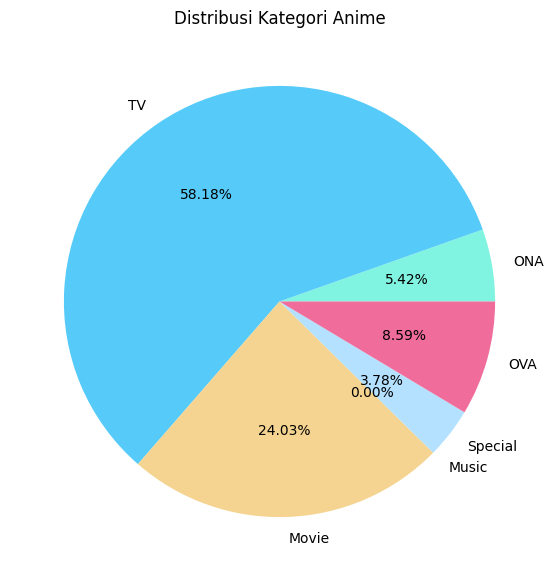

In [500]:
ona = df.loc[df['Type'] == 'ONA'].shape[0]
tv = df.loc[df['Type'] == 'TV'].shape[0]
movie = df.loc[df['Type'] == 'Movie'].shape[0]
music = df.loc[df['Type'] == 'Music'].shape[0]
special = df.loc[df['Type'] == 'Special'].shape[0]
ova = df.loc[df['Type'] == 'OVA'].shape[0]

labels = ['ONA', 'TV', 'Movie', 'Music', 'Special', 'OVA']
colors = ['#81F4E1', '#56CBF9', '#F5D491', '#BEB7A4', '#B4E1FF', '#F06C9B']

plt.figure(figsize=(10, 7))
plt.title('Distribusi Kategori Anime')
plt.pie([ona, tv, movie, music, special, ova],
        labels=labels,
        colors=colors,
        autopct='%.2f%%',
        textprops={'color': 'black'})

plt.show()

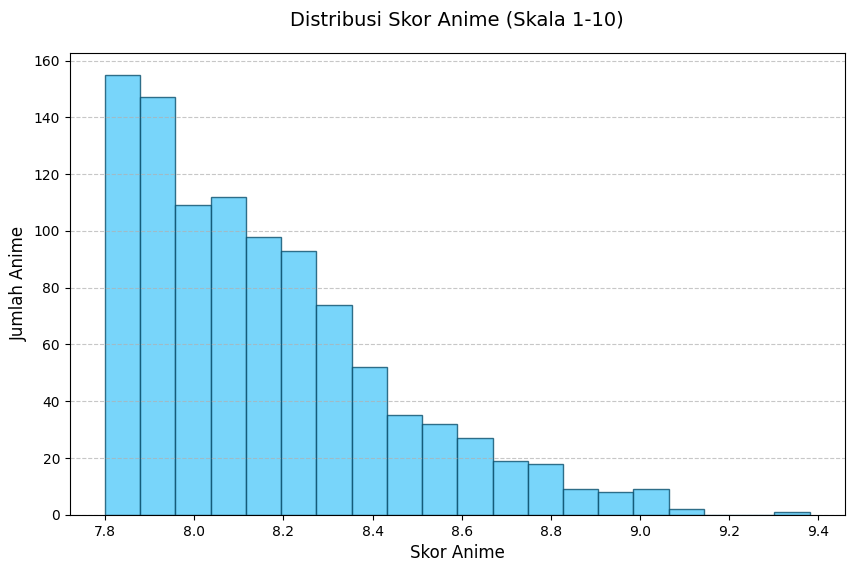

In [501]:
plt.figure(figsize=(10, 6))
plt.hist(df['Score'],
         bins=20,
         color='#56CBF9',
         edgecolor='#0B4F6C',
         alpha=0.8)
plt.xlabel('Skor Anime', fontsize=12)
plt.ylabel('Jumlah Anime', fontsize=12)
plt.title('Distribusi Skor Anime (Skala 1-10)', fontsize=14, pad=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [502]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Score,1000.0,8.15658,0.284344,7.8,7.92,8.1,8.3125,9.38
Popularity,1000.0,1805.63700,1888.308553,1.0,413.75,1139.5,2633.7500,12043.00
Rank,1000.0,500.50000,288.819436,1.0,250.75,500.5,750.2500,1000.00
Members,1000.0,223.64800,246.288299,1.0,31.75,132.0,330.0000,998.00


In [503]:
df.sort_values(by='Members', ascending=False).head()

,Score,Popularity,Rank,Members,Description,Synonyms,Japanese,English,Type,Episodes,...,Premiered,Broadcast,Producers,Licensors,Studios,Source,Genres,Demographic,Duration,Rating
282,8.28,156,283,998,Tokyo is currently experiencing rain showers t...,NaN,天気の子,Weathering with You,Movie,1,...,NaN,NaN,"TOHO, JR East Marketing & Communications, Kado...",GKIDS,CoMix Wave Films,Original,"Award WinningAward Winning, DramaDrama, Fantas...",NaN,1 hr. 52 min.,PG-13 - Teens 13 or older
737,7.93,158,738,985,"Having slept through all four of her alarms, t...",It's Difficult to Love an Otaku,ヲタクに恋は難しい,Wotakoi: Love is Hard for Otaku,TV,11,...,Spring 2018,Fridays at 00:55 (JST),"Aniplex, Dentsu, Fuji TV, Half H.P Studio, Ich...","None found, add some",A-1 Pictures,Web manga,NaN,NaN,22 min. per ep.,PG-13 - Teens 13 or older
648,7.99,160,649,973,The Moon Festival is Tootsuki Academy's annual...,"Shokugeki no Soma 3rd Season, Shokugeki no Soma 3",食戟のソーマ 餐ノ皿,Food Wars! The Third Plate,TV,12,...,Fall 2017,Wednesdays at 00:30 (JST),"Lantis, Warner Bros. Japan, KlockWorx, Shueisha",Sentai Filmworks,J.C.Staff,Manga,"GourmetGourmet, EcchiEcchi",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older
104,8.55,161,105,965,The aloof protagonist: a bookworm who is deepl...,"KimiSui, Let Me Eat Your Pancreas",君の膵臓をたべたい,I Want To Eat Your Pancreas,Movie,1,...,NaN,NaN,"Aniplex, ABC Animation",Aniplex of America,Studio VOLN,Novel,"DramaDrama, RomanceRomance",NaN,1 hr. 48 min.,PG-13 - Teens 13 or older
197,8.38,162,198,956,"Taking a break from his time as a teacher, the...",Tensura 2,転生したらスライムだった件,That Time I Got Reincarnated as a Slime Season 2,TV,12,...,Winter 2021,Tuesdays at 23:00 (JST),Kodansha,Funimation,8bit,Manga,"ActionAction, AdventureAdventure, ComedyComedy...",ShounenShounen,23 min. per ep.,PG-13 - Teens 13 or older


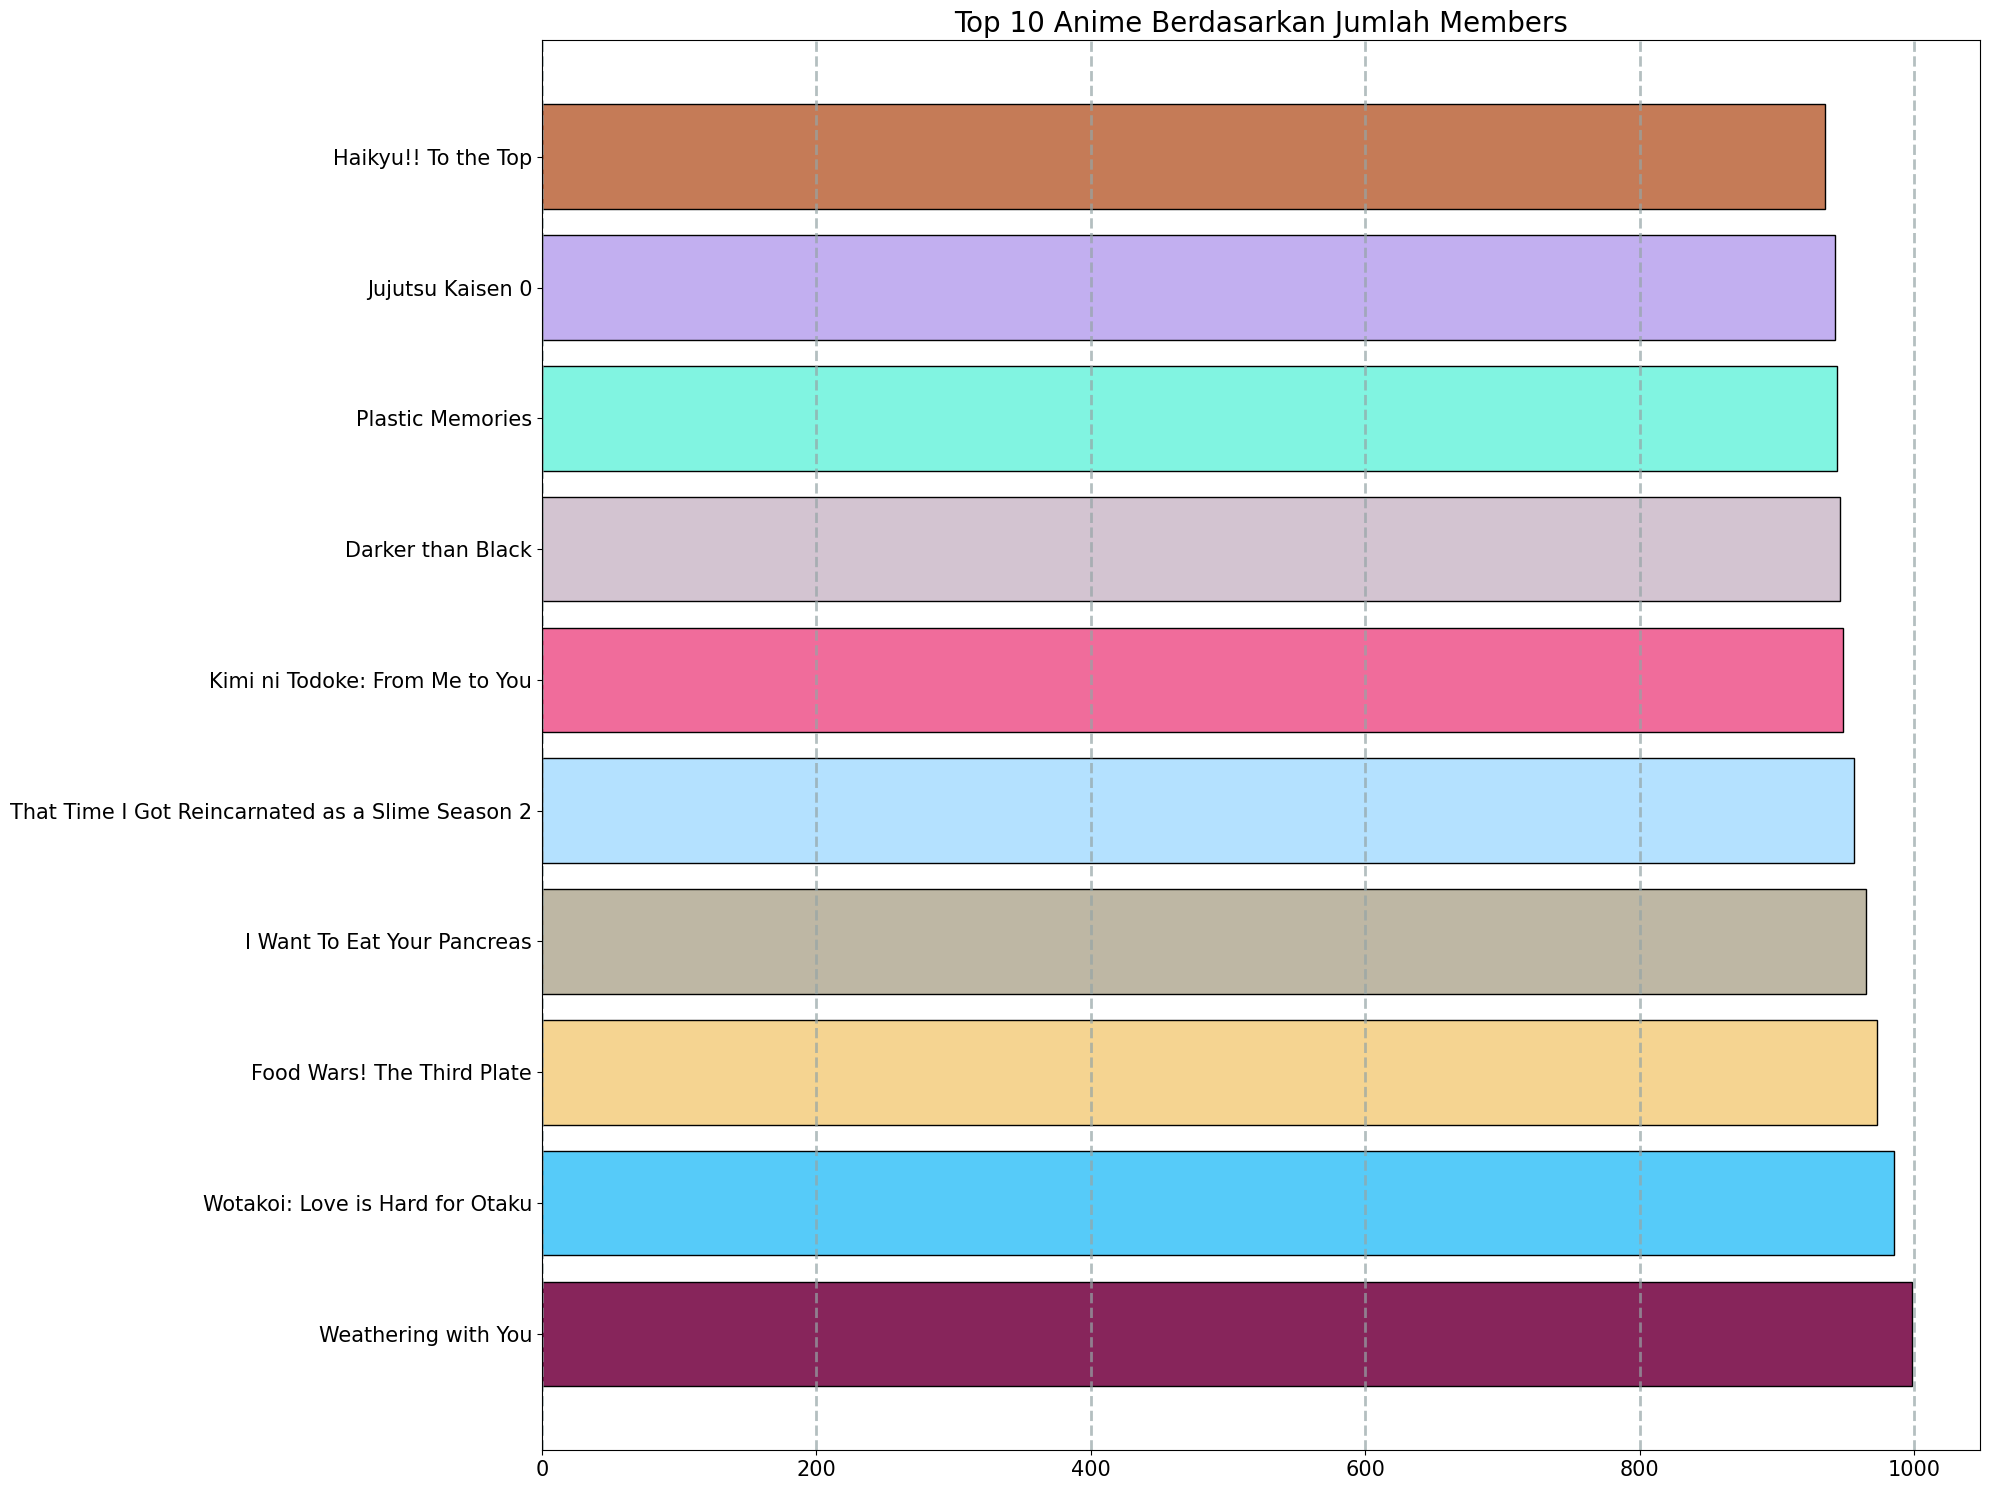

In [504]:
plt.figure(figsize=(20, 15))
top10_anime = df[['English', 'Members']].sort_values(by='Members', ascending=False).head(10)

colors = ['#87255B', '#56CBF9', '#F5D491', '#BEB7A4', '#B4E1FF', '#F06C9B', '#D3C4D1', '#81F4E1', '#C2AFF0', '#C57B57']

labels = top10_anime['English'].values.flatten()
values = top10_anime['Members'].values.flatten()

plt.barh(labels, values, color=colors, edgecolor='black')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.7)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Top 10 Anime Berdasarkan Jumlah Members", fontdict={'fontsize': 20})
plt.tight_layout()
plt.show()

In [505]:
df.sort_values(by='Score', ascending=False).head()

,Score,Popularity,Rank,Members,Description,Synonyms,Japanese,English,Type,Episodes,...,Premiered,Broadcast,Producers,Licensors,Studios,Source,Genres,Demographic,Duration,Rating
0,9.38,284,1,710,During their decade-long quest to defeat the D...,Frieren at the Funeral,葬送のフリーレン,Frieren: Beyond Journey's End,TV,28,...,Fall 2023,Fridays at 23:00 (JST),"Aniplex, Dentsu, Shogakukan-Shueisha Productio...","None found, add some",Madhouse,Manga,"AdventureAdventure, DramaDrama, FantasyFantasy",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older
1,9.09,3,2,3,After a horrific alchemy experiment goes wrong...,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist: Brotherhood,TV,64,...,Spring 2009,Sundays at 17:00 (JST),"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,"ActionAction, AdventureAdventure, DramaDrama, ...",ShounenShounen,24 min. per ep.,R - 17+ (violence & profanity)
2,9.07,13,3,2,Eccentric scientist Rintarou Okabe has a never...,NaN,STEINS;GATE,Steins;Gate,TV,24,...,Spring 2011,Wednesdays at 02:05 (JST),"Frontier Works, Media Factory, Kadokawa Shoten...",Funimation,White Fox,Visual novel,"DramaDrama, Sci-FiSci-Fi, SuspenseSuspense",NaN,24 min. per ep.,PG-13 - Teens 13 or older
3,9.06,342,4,630,"Gintoki, Shinpachi, and Kagura return as the f...",Gintama' (2015),銀魂°,Gintama Season 4,TV,51,...,Spring 2015,Wednesdays at 18:00 (JST),"TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,"ActionAction, ComedyComedy, Sci-FiSci-Fi",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older
4,9.05,21,5,2,Seeking to restore humanity's diminishing hope...,NaN,進撃の巨人 Season3 Part.2,Attack on Titan Season 3 Part 2,TV,10,...,Spring 2019,Mondays at 00:10 (JST),"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,"ActionAction, DramaDrama, SuspenseSuspense",ShounenShounen,23 min. per ep.,R - 17+ (violence & profanity)


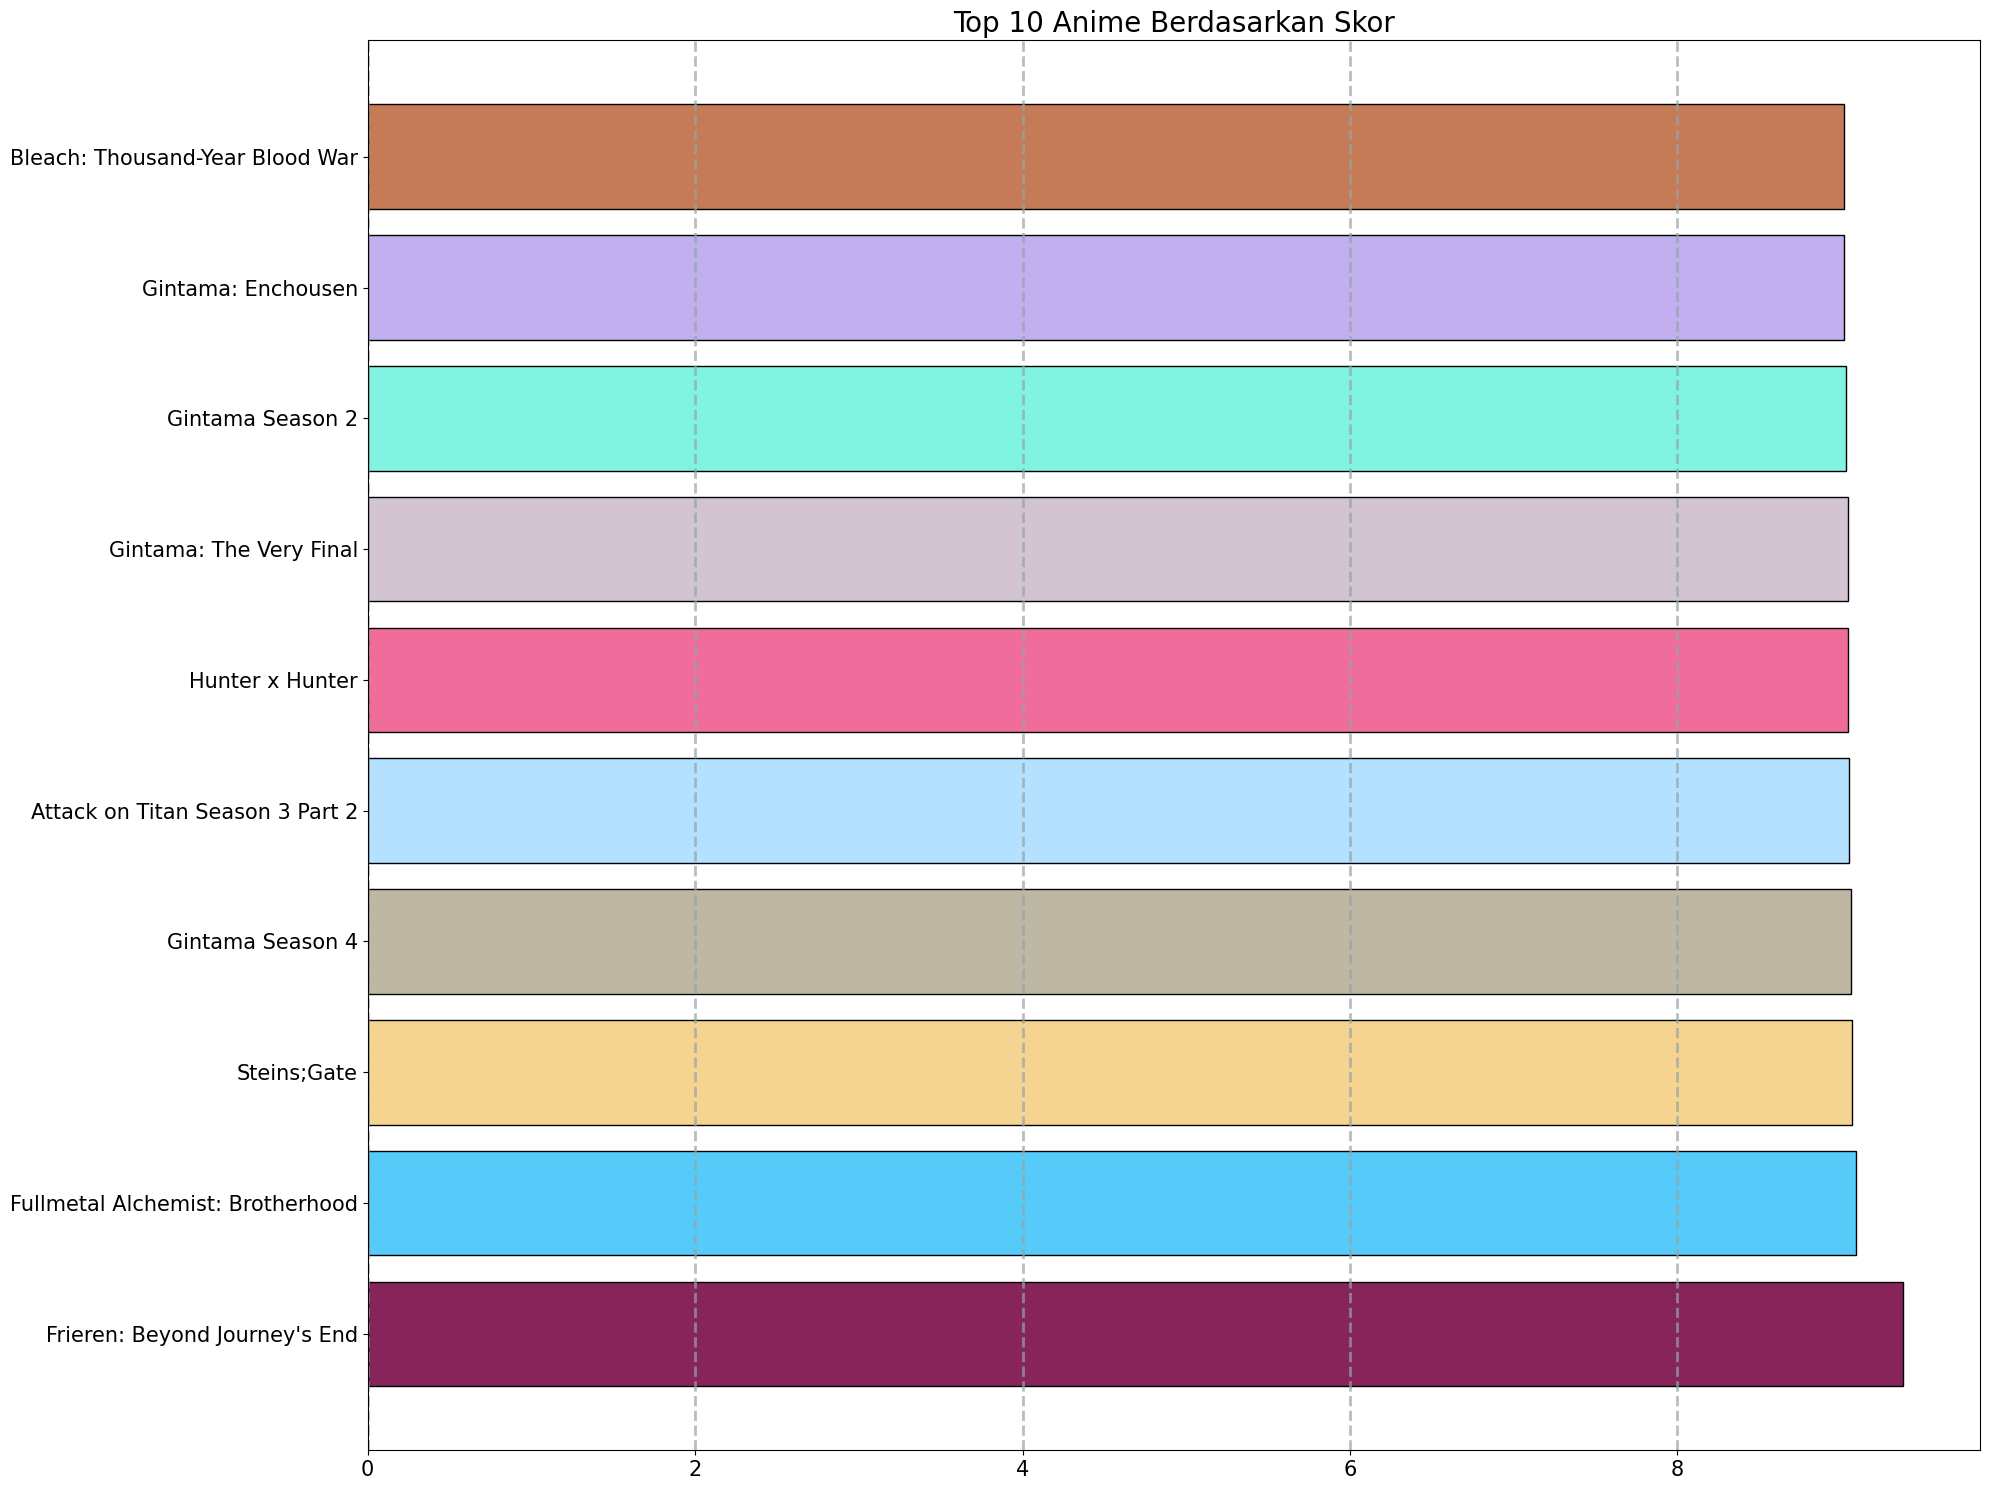

In [506]:
plt.figure(figsize=(20, 15))
top10_anime = df[['English', 'Score']].sort_values(by='Score', ascending=False).head(10)

colors = ['#87255B', '#56CBF9', '#F5D491', '#BEB7A4', '#B4E1FF', '#F06C9B',
          '#D3C4D1', '#81F4E1', '#C2AFF0', '#C57B57']

labels = top10_anime['English'].values.flatten()
values = top10_anime['Score'].values.flatten()

plt.barh(labels, values, color=colors, edgecolor='black')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.7)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Top 10 Anime Berdasarkan Skor", fontdict={'fontsize': 20})
plt.tight_layout()
plt.show()

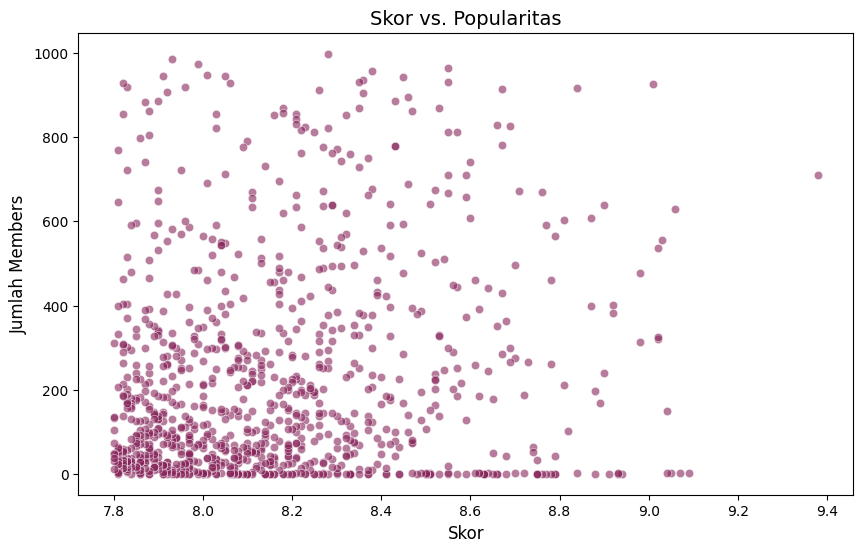

In [507]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Score', y='Members', data=df, alpha=0.6, color='#87255B')
plt.title('Skor vs. Popularitas', fontsize=14)
plt.xlabel('Skor', fontsize=12)
plt.ylabel('Jumlah Members', fontsize=12)
plt.show()

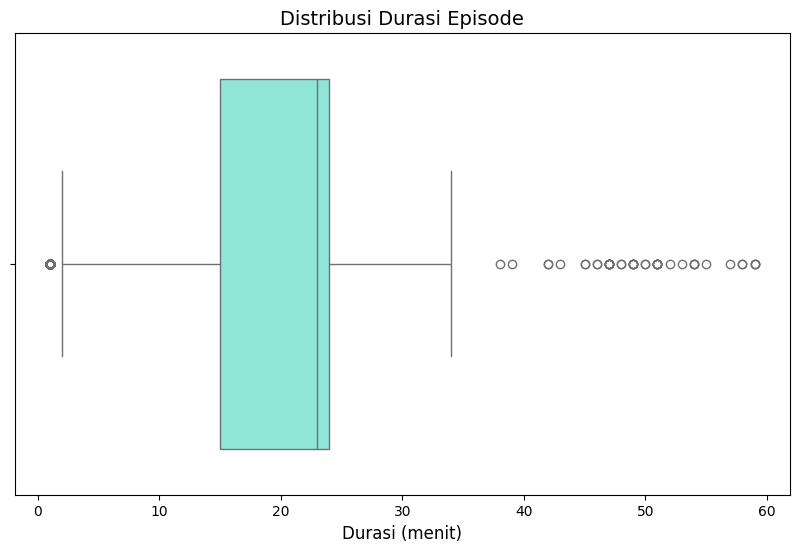

In [508]:
# Ekstrak durasi dalam menit (contoh: '24 min per ep' -> 24)
df['Duration_min'] = df['Duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Duration_min', data=df, color='#81F4E1')
plt.title('Distribusi Durasi Episode', fontsize=14)
plt.xlabel('Durasi (menit)', fontsize=12)
plt.show()

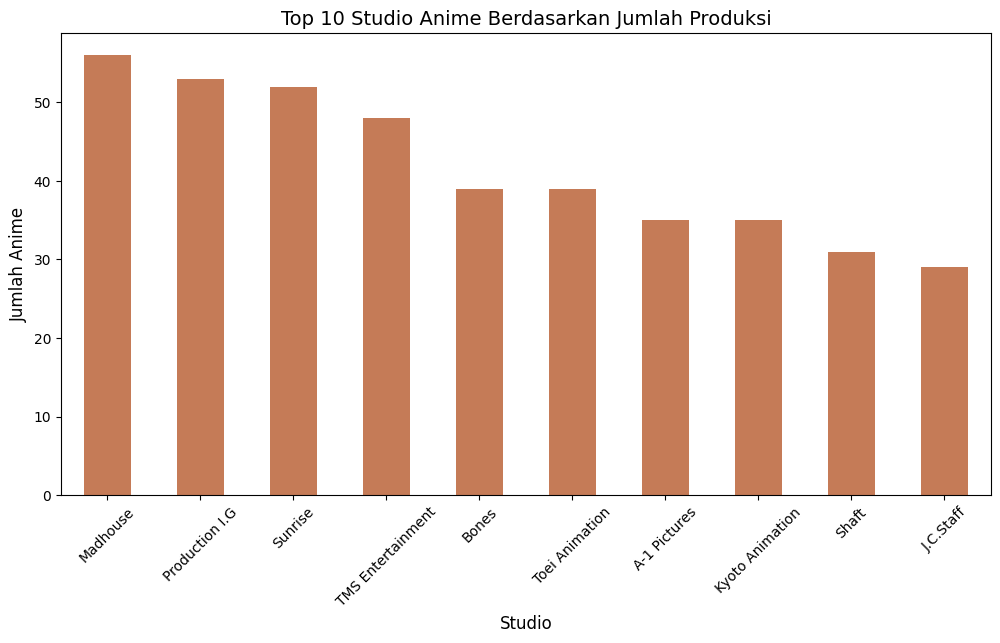

In [509]:
top_studios = df['Studios'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_studios.plot(kind='bar', color='#C57B57')
plt.title('Top 10 Studio Anime Berdasarkan Jumlah Produksi', fontsize=14)
plt.xlabel('Studio', fontsize=12)
plt.ylabel('Jumlah Anime', fontsize=12)
plt.xticks(rotation=45)
plt.show()

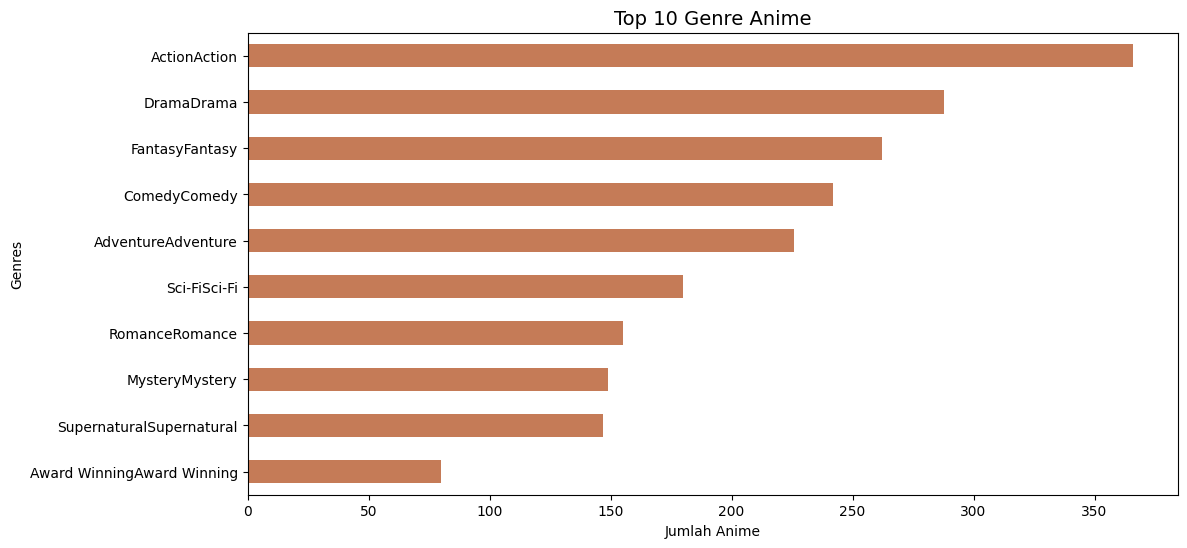

In [510]:
# Hitung frekuensi genre
all_genres = df['Genres'].str.split(', ').explode()
genre_counts = all_genres.value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='barh', color='#C57B57')
plt.title('Top 10 Genre Anime', fontsize=14)
plt.xlabel('Jumlah Anime')
plt.gca().invert_yaxis()
plt.show()

## Data Preparation

In [511]:
def clean_anime_title(text):
    if pd.isna(text):
        return ""
    text = re.sub(r"https?://\S+|www\.\S+", "", text)  # hapus URL
    text = re.sub(r"[^a-zA-Z0-9'\- ]", "", text)       # hapus karakter non-alfanumerik kecuali tanda kutip dan tanda hubung
    text = re.sub(r"\s+", " ", text).strip()           # normalisasi spasi
    return text

df['English'] = df['English'].apply(clean_anime_title)

In [512]:
def clean_genres(genre_text):
    if pd.isna(genre_text):
        return ""
    raw_genres = genre_text.split(',')
    cleaned_genres = set()
    for genre in raw_genres:
        genre = genre.strip()
        half = len(genre) // 2
        if len(genre) % 2 == 0 and genre[:half].lower() == genre[half:].lower():
            genre = genre[:half]  # deteksi pengulangan
        cleaned_genres.add(genre.lower())
    return ", ".join(sorted(cleaned_genres))

df['Genres'] = df['Genres'].apply(clean_genres)

In [513]:
def clean_studios(studio_str):
    if pd.isna(studio_str):
        return ""
    studios = [s.strip().lower() for s in studio_str.split(",") if s.strip()]
    return ", ".join(sorted(set(studios)))

df['Studios'] = df['Studios'].apply(clean_studios)

In [514]:
df

,Score,Popularity,Rank,Members,Description,Synonyms,Japanese,English,Type,Episodes,...,Broadcast,Producers,Licensors,Studios,Source,Genres,Demographic,Duration,Rating,Duration_min
0,9.38,284,1,710,During their decade-long quest to defeat the D...,Frieren at the Funeral,葬送のフリーレン,Frieren Beyond Journey's End,TV,28,...,Fridays at 23:00 (JST),"Aniplex, Dentsu, Shogakukan-Shueisha Productio...","None found, add some",madhouse,Manga,"adventure, drama, fantasy",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older,24.0
1,9.09,3,2,3,After a horrific alchemy experiment goes wrong...,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist Brotherhood,TV,64,...,Sundays at 17:00 (JST),"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",bones,Manga,"action, adventure, drama, fantasy",ShounenShounen,24 min. per ep.,R - 17+ (violence & profanity),24.0
2,9.07,13,3,2,Eccentric scientist Rintarou Okabe has a never...,NaN,STEINS;GATE,SteinsGate,TV,24,...,Wednesdays at 02:05 (JST),"Frontier Works, Media Factory, Kadokawa Shoten...",Funimation,white fox,Visual novel,"drama, sci-fi, suspense",NaN,24 min. per ep.,PG-13 - Teens 13 or older,24.0
3,9.06,342,4,630,"Gintoki, Shinpachi, and Kagura return as the f...",Gintama' (2015),銀魂°,Gintama Season 4,TV,51,...,Wednesdays at 18:00 (JST),"TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",bandai namco pictures,Manga,"action, comedy, sci-fi",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older,24.0
4,9.05,21,5,2,Seeking to restore humanity's diminishing hope...,NaN,進撃の巨人 Season3 Part.2,Attack on Titan Season 3 Part 2,TV,10,...,Mondays at 00:10 (JST),"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,wit studio,Manga,"action, drama, suspense",ShounenShounen,23 min. per ep.,R - 17+ (violence & profanity),23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.80,4003,996,31,Half retelling of the original Frontier series...,"Macross Frontier the Movie, Gekijouban Macross...",劇場版 マクロスＦ 虚空歌姫 ～イツワリノウタヒメ～,Macross Frontier The False Songstress,Movie,1,...,NaN,"Bandai Visual, Big West, KlockWorx, Bandai Nam...","None found, add some","8bit, satelight",Original,"action, romance, sci-fi",NaN,1 hr. 59 min.,PG-13 - Teens 13 or older,1.0
996,7.80,1658,997,136,"Not so long ago, mysterious structures called ...",Magi: Adventure of Sinbad OVA,マギ シンドバッドの冒険,,OVA,5,...,NaN,"Aniplex, Shogakukan","None found, add some",lay-duce,Manga,"action, adventure, fantasy",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older,24.0
997,7.80,3114,998,50,Fifteen years ago in a barren stretch of the P...,NaN,名探偵コナン 水平線上の陰謀,Detective Conan Movie 09 Strategy Above the De...,Movie,1,...,NaN,"None found, add some","None found, add some",tms entertainment,Manga,"adventure, comedy, mystery",ShounenShounen,1 hr. 50 min.,PG-13 - Teens 13 or older,1.0
998,7.80,3194,999,47,Serial murders involving all kinds have happen...,Meitantei Conan: Senritsu no Gakufu [Full Score],名探偵コナン 戦慄の楽譜（フルスコア）,Detective Conan Movie 12 Full Score of Fear,Movie,1,...,NaN,"Shogakukan-Shueisha Productions, Tokyo Movie S...","None found, add some",tms entertainment,Manga,"adventure, comedy, mystery",ShounenShounen,1 hr. 56 min.,PG-13 - Teens 13 or older,1.0


In [515]:
df.astype(str).duplicated().sum()

np.int64(0)

Tidak terdapat data duplikat

In [516]:
df.isnull().sum()

,0
Score,0
Popularity,0
Rank,0
Members,0
Description,0
Synonyms,291
Japanese,1
English,0
Type,0
Episodes,0


Terdapat *Missing value* pada kolom `sypnopsis, Japanese, English, Premiered, Broadcast, Genres dan Demographic`

In [517]:
df.dropna()

,Score,Popularity,Rank,Members,Description,Synonyms,Japanese,English,Type,Episodes,...,Broadcast,Producers,Licensors,Studios,Source,Genres,Demographic,Duration,Rating,Duration_min
0,9.38,284,1,710,During their decade-long quest to defeat the D...,Frieren at the Funeral,葬送のフリーレン,Frieren Beyond Journey's End,TV,28,...,Fridays at 23:00 (JST),"Aniplex, Dentsu, Shogakukan-Shueisha Productio...","None found, add some",madhouse,Manga,"adventure, drama, fantasy",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older,24.0
1,9.09,3,2,3,After a horrific alchemy experiment goes wrong...,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist Brotherhood,TV,64,...,Sundays at 17:00 (JST),"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",bones,Manga,"action, adventure, drama, fantasy",ShounenShounen,24 min. per ep.,R - 17+ (violence & profanity),24.0
3,9.06,342,4,630,"Gintoki, Shinpachi, and Kagura return as the f...",Gintama' (2015),銀魂°,Gintama Season 4,TV,51,...,Wednesdays at 18:00 (JST),"TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",bandai namco pictures,Manga,"action, comedy, sci-fi",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older,24.0
6,9.04,9,7,2,Hunters devote themselves to accomplishing haz...,HxH (2011),HUNTER×HUNTER（ハンター×ハンター）,Hunter x Hunter,TV,148,...,Sundays at 10:55 (JST),"VAP, Nippon Television Network, Shueisha",VIZ Media,madhouse,Manga,"action, adventure, fantasy",ShounenShounen,23 min. per ep.,PG-13 - Teens 13 or older,23.0
7,9.03,393,8,555,"After a one-year hiatus, Shinpachi Shimura ret...",Gintama (2011),銀魂',Gintama Season 2,TV,51,...,Mondays at 18:00 (JST),"TV Tokyo, Aniplex, Dentsu, Trinity Sound, Mira...","None found, add some",sunrise,Manga,"action, comedy, sci-fi",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,7.82,915,966,264,The exciting antics of Wagnaria return as more...,Working!! 2,ワーキング’！！,Wagnaria2,TV,13,...,Unknown,"Aniplex, Yomiuri Telecasting, Rakuonsha","NIS America, Inc.",a-1 pictures,4-koma manga,,SeinenSeinen,24 min. per ep.,PG-13 - Teens 13 or older,24.0
974,7.81,92,975,1,"For weeks, Atsushi Nakajima's orphanage has be...","Literary Stray Dogs, BSD",文豪ストレイドッグス,Bungo Stray Dogs,TV,12,...,Thursdays at 01:05 (JST),"Lantis, Movic, KlockWorx, Bandai Namco Live Cr...","Funimation, Crunchyroll",bones,Manga,"action, mystery, supernatural",SeinenSeinen,23 min. per ep.,R - 17+ (violence & profanity),23.0
975,7.81,250,976,769,After his confrontation in the Nether with his...,"Enen no Shouboutai 2nd Season, Fire Force 2nd ...",炎炎ノ消防隊 弐ノ章,Fire Force Season 2,TV,24,...,Saturdays at 01:55 (JST),"Mainichi Broadcasting System, Kodansha, bilibi...",Funimation,david production,Manga,"action, fantasy, sci-fi",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older,24.0
981,7.81,1165,982,207,"Rentarou Aijou has it all: looks, intelligence...",Hyakkano,君のことが大大大大大好きな100人の彼女,The 100 Girlfriends Who Really Really Really R...,TV,12,...,Sundays at 22:30 (JST),"Lantis, Movic, Bushiroad, Tokyo MX, Shueisha, ...","None found, add some",bibury animation studios,Manga,"comedy, romance",SeinenSeinen,23 min. per ep.,PG-13 - Teens 13 or older,23.0


Menghapus data *Missing value*

In [518]:
df.isnull().sum()

,0
Score,0
Popularity,0
Rank,0
Members,0
Description,0
Synonyms,291
Japanese,1
English,0
Type,0
Episodes,0


In [519]:
print(f'Terdapat  {df.shape[0]} Table dan {df.shape[1]} columns.')

Terdapat  1000 Table dan 23 columns.


In [520]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Score,1000.0,8.15658,0.284344,7.8,7.92,8.1,8.3125,9.38
Popularity,1000.0,1805.63700,1888.308553,1.0,413.75,1139.5,2633.7500,12043.00
Rank,1000.0,500.50000,288.819436,1.0,250.75,500.5,750.2500,1000.00
Members,1000.0,223.64800,246.288299,1.0,31.75,132.0,330.0000,998.00
Duration_min,1000.0,19.46100,11.561234,1.0,15.00,23.0,24.0000,59.00


Fungsi `describe()` memberikan informasi statistik pada masing-masing kolom, antara lain:

- `Count` adalah jumlah sampel pada data.
- `Mean` adalah nilai rata-rata.
- `Std` adalah standar deviasi.
- `Min` yaitu nilai minimum setiap kolom.
- `25%` adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- `50%` adalah kuartil kedua, atau biasa juga disebut median (nilai tengah). - 75% adalah kuartil ketiga.
- `Max` adalah nilai maksimum.

In [521]:
# Convert numerical columns to numeric
df['Episodes'] = pd.to_numeric(df['Episodes'], errors='coerce')
df['Episodes'] = df['Episodes'].fillna(df['Episodes'].median())

# One-Hot Encoding for categorical features
categorical_cols = ['Type', 'Status', 'Source', 'Rating']
df_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)

# Prepare numerical features
numeric_features = df[['Score', 'Members', 'Popularity', 'Rank', 'Episodes']]
scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(numeric_features)

In [522]:
# Feature Extraction with TF-IDF
tfidf_title = TfidfVectorizer(max_features=300)
title_tfidf = tfidf_title.fit_transform(df['English'])
tfidf_genre = TfidfVectorizer(max_features=100)
genre_tfidf = tfidf_genre.fit_transform(df['Genres'])
tfidf_studio = TfidfVectorizer(max_features=50)
studio_tfidf = tfidf_studio.fit_transform(df['Studios'])

# Combine TF-IDF features
tfidf_features = hstack([title_tfidf, genre_tfidf, studio_tfidf])

In [523]:
# Combine all features
all_features = hstack([tfidf_features, scaled_numeric])

## Model Development

### Model Cosine Similarity Recommendation

In [524]:
# Hitung matriks similaritas
cosine_sim = cosine_similarity(all_features, dense_output=False)

In [525]:
def cosine_recommender(anime_index, n_recommend=5):
    # Dapatkan skor similaritas untuk anime target
    sim_scores = list(enumerate(cosine_sim[anime_index].toarray().flatten()))

    # Urutkan berdasarkan skor tertinggi
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Ambil n_recommend + 1 (karena termasuk diri sendiri)
    sim_scores = sim_scores[1:n_recommend+1]  # Exclude itself

    # Dapatkan indeks anime yang direkomendasikan
    anime_indices = [i[0] for i in sim_scores]

    # Return dataframe rekomendasi
    recommendations = df.iloc[anime_indices][['English', 'Score', 'Genres', 'Type', 'Studios']]
    recommendations['Similarity Score'] = [i[1] for i in sim_scores]

    return recommendations

In [534]:
cosine_recommender(anime_index = 10, n_recommend=5)

,English,Score,Genres,Type,Studios,Similarity Score
7,Gintama Season 2,9.03,"action, comedy, sci-fi",TV,sunrise,0.955553
20,Gintama The Movie The Final Chapter Be Forever...,8.90,"action, comedy, sci-fi",Movie,sunrise,0.949964
13,Gintama Season 5,8.98,"action, comedy, sci-fi",TV,bandai namco pictures,0.922865
5,Gintama The Very Final,9.04,"action, comedy, drama, sci-fi",Movie,bandai namco pictures,0.885816
3,Gintama Season 4,9.06,"action, comedy, sci-fi",TV,bandai namco pictures,0.884741


### Model KNN

In [526]:
# Bangun model KNN dengan metrik cosine
knn_model = NearestNeighbors(
    n_neighbors=6,
    metric='cosine',
    algorithm='brute'
)

In [527]:
# Latih model dengan data features gabungan
knn_model.fit(all_features)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=6)

In [528]:
def knn_recommender(anime_index, n_recommend=5):
    # Mengonversi sparse matrix ke array
    all_features_array = all_features.toarray()

    # Dapatkan query (anime target)
    query = all_features_array[anime_index].reshape(1, -1)  # Mengubah bentuk menjadi 2D

    # Cari anime terdekat
    distances, indices = knn_model.kneighbors(query, n_neighbors=n_recommend+1)

    # Exclude diri sendiri
    indices = indices.flatten()[1:]
    distances = distances.flatten()[1:]

    # Return dataframe rekomendasi
    recommendations = df.iloc[indices][['English', 'Score', 'Genres', 'Type', 'Studios']]
    recommendations['Distance Score'] = 1 - distances  # Convert ke similarity score

    return recommendations

In [535]:
knn_recommender(anime_index = 10, n_recommend=5)

,English,Score,Genres,Type,Studios,Distance Score
7,Gintama Season 2,9.03,"action, comedy, sci-fi",TV,sunrise,0.955553
20,Gintama The Movie The Final Chapter Be Forever...,8.90,"action, comedy, sci-fi",Movie,sunrise,0.949964
13,Gintama Season 5,8.98,"action, comedy, sci-fi",TV,bandai namco pictures,0.922865
5,Gintama The Very Final,9.04,"action, comedy, drama, sci-fi",Movie,bandai namco pictures,0.885816
3,Gintama Season 4,9.06,"action, comedy, sci-fi",TV,bandai namco pictures,0.884741


## Evaluation

In [529]:
def evaluate_recommendations(true_recommendations, predicted_recommendations):
    # Mengonversi ke set untuk perbandingan
    true_set = set(true_recommendations)
    predicted_set = set(predicted_recommendations)

    # Hitung True Positives, False Positives, dan False Negatives
    true_positives = len(true_set.intersection(predicted_set))
    false_positives = len(predicted_set - true_set)
    false_negatives = len(true_set - predicted_set)

    # Hitung Precision, Recall, dan F1 Score
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

In [530]:
# Ambil anime target berdasarkan indeks
target_index = 0
anime_target = df.iloc[target_index][['English', 'Score', 'Genres', 'Type', 'Studios']]

# Cetak informasi anime target
print("🎯 Anime Target:")
print("-"*50)
print(f"Judul: {anime_target['English']}")
print(f"Genre: {anime_target['Genres']}")
print(f"Studio: {anime_target['Studios']}")
print(f"Tipe: {anime_target['Type']}")
print(f"Skor: {anime_target['Score']}\n")

# Ambil rekomendasi dari kedua model
cosine_recommendations = cosine_recommender(target_index)['English'].tolist()
knn_recommendations = knn_recommender(target_index)['English'].tolist()

# Cetak rekomendasi yang dihasilkan
print("Rekomendasi Cosine Similarity:", cosine_recommendations)
print("Rekomendasi KNN:", knn_recommendations)

# Contoh ground truth yang diperbarui
true_recommendations = ['Bleach Thousand-Year Blood War', 'Fighting Spirit', 'Gintama Season 4', 'Gintama Season 2', 'Odd Taxi']

# Cetak ground truth
print("Ground Truth:", true_recommendations)

# Evaluasi rekomendasi
cosine_evaluation_results = evaluate_recommendations(true_recommendations, cosine_recommendations)
knn_evaluation_results = evaluate_recommendations(true_recommendations, knn_recommendations)

# Cetak hasil evaluasi
print("\n📊 Hasil Evaluasi Rekomendasi Cosine Similarity 📊")
print(f"Precision: {cosine_evaluation_results['Precision']:.2f}")
print(f"Recall: {cosine_evaluation_results['Recall']:.2f}")
print(f"F1 Score: {cosine_evaluation_results['F1 Score']:.2f}")

print("\n📊 Hasil Evaluasi Rekomendasi KNN 📊")
print(f"Precision: {knn_evaluation_results['Precision']:.2f}")
print(f"Recall: {knn_evaluation_results['Recall']:.2f}")
print(f"F1 Score: {knn_evaluation_results['F1 Score']:.2f}")

🎯 Anime Target:
--------------------------------------------------
Judul: Frieren Beyond Journey's End
Genre: adventure, drama, fantasy
Studio: madhouse
Tipe: TV
Skor: 9.38

Rekomendasi Cosine Similarity: ['Bleach Thousand-Year Blood War', 'Fighting Spirit', 'Gintama Season 4', 'Gintama Season 2', 'Odd Taxi']
Rekomendasi KNN: ['Bleach Thousand-Year Blood War', 'Fighting Spirit', 'Gintama Season 4', 'Gintama Season 2', 'Odd Taxi']
Ground Truth: ['Bleach Thousand-Year Blood War', 'Fighting Spirit', 'Gintama Season 4', 'Gintama Season 2', 'Odd Taxi']

📊 Hasil Evaluasi Rekomendasi Cosine Similarity 📊
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

📊 Hasil Evaluasi Rekomendasi KNN 📊
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
